In [1]:
from ctd.comparison.analysis.tt.tt import Analysis_TT
from ctd.comparison.analysis.dd.dd import Analysis_DD
from ctd.comparison.comparison import Comparison
import dotenv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
# import environment variables
dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
print(HOME_DIR)


/home/csverst/Github/CtDBenchmark/


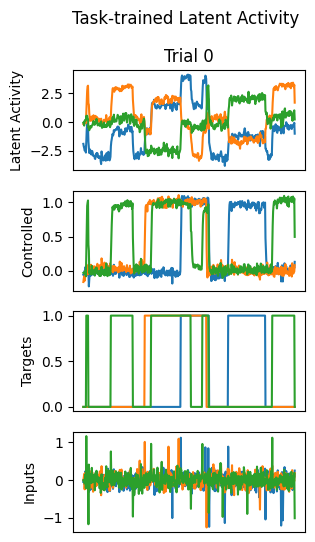

In [2]:
tt_path = HOME_DIR + "content/trained_models/task-trained/tt_3bff/"
tt_analysis = Analysis_TT(run_name = "tt_3bff",filepath=tt_path)

tt_analysis.plot_trial_io(num_trials= 1)

In [3]:

# REPLACE THESE PATHS WITH YOUR OWN DD MODEL PATHS
NODE_sweep_path = tt_path + "20250207_3BFF_NODE_sweep/"
NODE_subfolders = [f.path for f in os.scandir(NODE_sweep_path) if f.is_dir()]

In [4]:
comparison_NODE = Comparison(comparison_tag = "3BFF_NODE")
comparison_NODE.load_analysis(tt_analysis, group = "TT", reference_analysis=True)
lat_sizes = []
for subfolder in NODE_subfolders:
    subfolder = subfolder + "/"
    # print(subfolder.split("latent_size="))
    lat_size = int(subfolder.split("latent_size=")[1].split("_")[0])
    analysis_NODE = Analysis_DD.create(run_name = f"NODE_{lat_size}", filepath = subfolder, model_type = "SAE")
    print(f"NODE_{lat_size}")
    lat_sizes.append(lat_size)
    comparison_NODE.load_analysis(analysis_NODE, group = "NODE")

    

NODE_8
NODE_5
NODE_8
NODE_64
NODE_3
NODE_64
NODE_32
NODE_3
NODE_32
NODE_5
NODE_16
NODE_16
NODE_8
NODE_5
NODE_16
NODE_3
NODE_3
NODE_32
NODE_8
NODE_8
NODE_64
NODE_5
NODE_16
NODE_32
NODE_3
NODE_32
NODE_5
NODE_64
NODE_64
NODE_16


In [5]:
metric_list = ["state_r2", "rate_r2", 'co-bps', 'cycle_con']
metrics_NODE = comparison_NODE.compute_metrics(metric_list=metric_list, cycle_con_var=0.01)


Working on 1 of 31: tt_3bff

Working on 2 of 31: NODE_8
State R2: 0.9598118662834167
Rate R2: 0.9152765274047852
CO-BPS: 0.12696287035942078
Cycle Consistency R2: 1.0

Working on 3 of 31: NODE_5
State R2: 0.9537246227264404
Rate R2: 0.8785637021064758
CO-BPS: 0.12153352797031403
Cycle Consistency R2: 1.0

Working on 4 of 31: NODE_8
State R2: 0.9371523857116699
Rate R2: 0.8917036056518555
CO-BPS: 0.12362771481275558
Cycle Consistency R2: 1.0

Working on 5 of 31: NODE_64
State R2: 0.5342442989349365
Rate R2: 0.912463366985321
CO-BPS: 0.12668156623840332
Cycle Consistency R2: 0.5791611671447754

Working on 6 of 31: NODE_3
State R2: 0.9574345946311951
Rate R2: 0.8480465412139893
CO-BPS: 0.11721652746200562
Cycle Consistency R2: 1.0

Working on 7 of 31: NODE_64
State R2: 0.551735520362854
Rate R2: 0.9188950657844543
CO-BPS: 0.1276279240846634
Cycle Consistency R2: 0.6035640239715576

Working on 8 of 31: NODE_32
State R2: 0.6430109739303589
Rate R2: 0.9161737561225891
CO-BPS: 0.127136632800

In [6]:

lat_sizes, metrics_NODE["state_r2"], metrics_NODE["rate_r2"], metrics_NODE["co-bps"], metrics_NODE['cycle_con'] = zip(*sorted(zip(lat_sizes, metrics_NODE["state_r2"], metrics_NODE["rate_r2"], metrics_NODE["co-bps"], metrics_NODE['cycle_con'])))


In [7]:
metrics = ["state_r2", "rate_r2", "co-bps", "cycle_con"]
mean_metrics = {k:[] for k in metrics}
for lat in np.unique(lat_sizes):
    for met in metrics:
        met_list = np.array(metrics_NODE[met])
        lat_met = met_list[lat_sizes == lat]
        mean_metrics[met].append([lat, np.mean(lat_met)])

for met in metrics:
    mean_metrics[met] = np.array(mean_metrics[met])

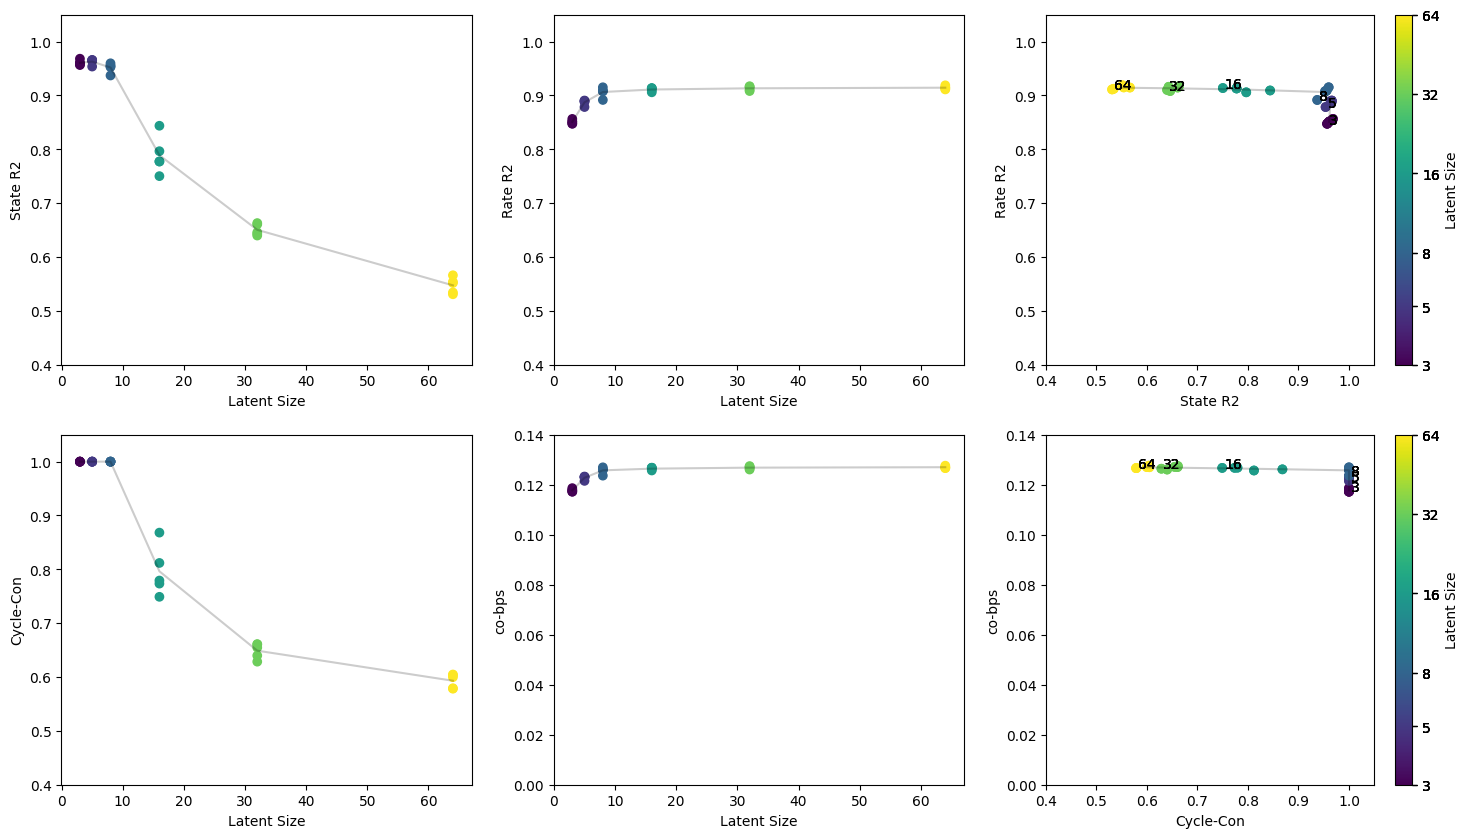

In [8]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

ax[0,0].scatter(lat_sizes, metrics_NODE["state_r2"], c = np.log10(lat_sizes))
ax[0,0].plot(mean_metrics['state_r2'][:,0],mean_metrics['state_r2'][:,1], c= 'k', alpha=0.2)
ax[0,0].set_xlabel("Latent Size")
ax[0,0].set_ylabel("State R2")
ax[0,0].set_ylim(0.4, 1.05)

ax[0,1].scatter(lat_sizes, metrics_NODE["rate_r2"], c = np.log10(lat_sizes))
ax[0,1].plot(mean_metrics['rate_r2'][:,0], mean_metrics['rate_r2'][:,1], c= 'k', alpha=0.2)
ax[0,1].set_xlabel("Latent Size")
ax[0,1].set_ylabel("Rate R2")
ax[0,1].set_ylim(0.4, 1.05)

ax[0,2].scatter(metrics_NODE["state_r2"], metrics_NODE["rate_r2"], c=np.log10(lat_sizes))
ax[0,2].plot(mean_metrics['state_r2'][:,1], mean_metrics['rate_r2'][:,1], c= 'k', alpha=0.2)
ax[0,2].set_xlabel("State R2")
ax[0,2].set_ylabel("Rate R2")
ax[0,2].set_xlim(0.4, 1.05)
ax[0,2].set_ylim(0.4, 1.05)

# add colorbar with ticks for each latent size
cbar = plt.colorbar(ax[0,2].scatter(metrics_NODE["state_r2"], metrics_NODE["rate_r2"], c=np.log10(lat_sizes)))
cbar.set_label("Latent Size")
cbar.set_ticks(np.log10(lat_sizes))
cbar.set_ticklabels(lat_sizes)

for lat_size in lat_sizes:
    ax[0,2].text(metrics_NODE["state_r2"][lat_sizes.index(lat_size)]+0.004, metrics_NODE["rate_r2"][lat_sizes.index(lat_size)], str(lat_size))


# Non-ground-truth metrics
ax[1,0].scatter(lat_sizes, metrics_NODE["cycle_con"], c = np.log10(lat_sizes))
ax[1,0].plot(mean_metrics['cycle_con'][:,0], mean_metrics['cycle_con'][:,1], c= 'k', alpha=0.2)
ax[1,0].set_xlabel("Latent Size")
ax[1,0].set_ylabel("Cycle-Con")
ax[1,0].set_ylim(0.4, 1.05)

ax[1,1].scatter(lat_sizes, metrics_NODE["co-bps"], c = np.log10(lat_sizes))
ax[1,1].plot(mean_metrics['co-bps'][:,0], mean_metrics['co-bps'][:,1], c= 'k', alpha=0.2)
ax[1,1].set_xlabel("Latent Size")
ax[1,1].set_ylabel("co-bps")
ax[1,1].set_ylim(0.0, 0.14)

ax[1,2].scatter(metrics_NODE["cycle_con"], metrics_NODE["co-bps"], c=np.log10(lat_sizes))
ax[1,2].plot(mean_metrics['cycle_con'][:,1], mean_metrics['co-bps'][:,1], c= 'k', alpha=0.2)
ax[1,2].set_xlabel("Cycle-Con")
ax[1,2].set_ylabel("co-bps")
ax[1,2].set_xlim(0.4, 1.05)
ax[1,2].set_ylim(0.0, 0.14)

# add colorbar with ticks for each latent size
cbar = plt.colorbar(ax[1,2].scatter(metrics_NODE["cycle_con"], metrics_NODE["co-bps"], c=np.log10(lat_sizes)))
cbar.set_label("Latent Size")
cbar.set_ticks(np.log10(lat_sizes))
cbar.set_ticklabels(lat_sizes)

for lat_size in lat_sizes:
    ax[1,2].text(metrics_NODE["cycle_con"][lat_sizes.index(lat_size)]+0.004, metrics_NODE["co-bps"][lat_sizes.index(lat_size)], str(lat_size))



(0.0, 0.14)

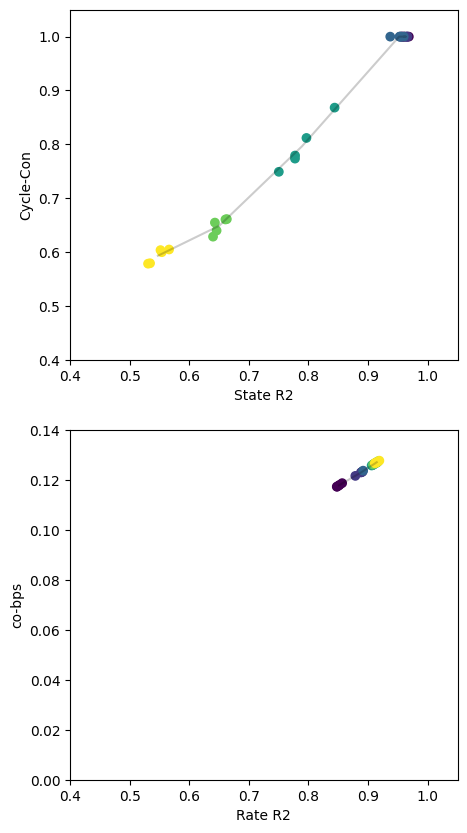

In [9]:
fig = plt.figure(figsize=(5, 10))
ax =fig.add_subplot(211)
ax.scatter(metrics_NODE["state_r2"], metrics_NODE["cycle_con"], c=np.log10(lat_sizes))
ax.plot(mean_metrics['state_r2'][:,1], mean_metrics['cycle_con'][:,1], c= 'k', alpha=0.2)
ax.set_xlabel("State R2")
ax.set_ylabel("Cycle-Con")
ax.set_xlim(0.4, 1.05)
ax.set_ylim(0.4, 1.05)

ax =fig.add_subplot(212)
ax.scatter(metrics_NODE["rate_r2"], metrics_NODE["co-bps"], c=np.log10(lat_sizes))
ax.plot(mean_metrics['rate_r2'][:,1], mean_metrics['co-bps'][:,1], c= 'k', alpha=0.2)
ax.set_xlabel("Rate R2")
ax.set_ylabel("co-bps")
ax.set_xlim(0.4, 1.05)
ax.set_ylim(0.0, 0.14)


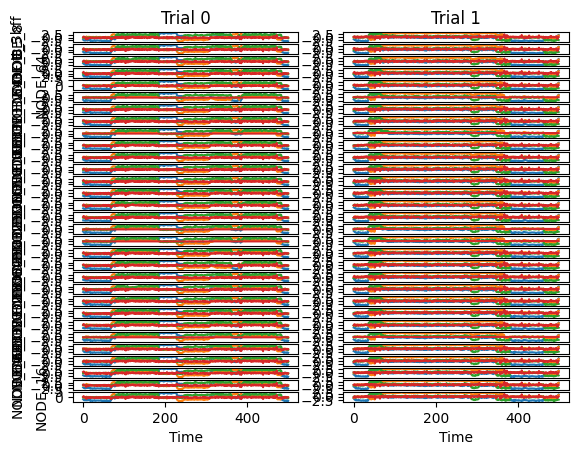

In [10]:
comparison_NODE.plot_trials_reference()